In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.porter import *
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import datetime

from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams

import string
import gensim
from gensim.models.phrases import Phraser, Phrases
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
pd.set_option('max_colwidth',400)
from bs4 import BeautifulSoup
import re

from tqdm import tqdm
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure
%matplotlib inline
from collections import defaultdict

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [2]:
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [3]:
from keras.utils import to_categorical
import random
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense,Dropout,Embedding,LSTM
from keras.callbacks import EarlyStopping
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.models import Sequential


In [ ]:
# from google.colab import drive 
# drive.mount('/content/gdrive/', force_remount=True)

In [4]:
import urllib.request as req
import tarfile
import os

imdb_url="https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
save_filename="aclImdb_v1.tar.gz"
if not os.path.exists(save_filename):
    req.urlretrieve(imdb_url,save_filename)

imdb_folder="aclImdb"
if not os.path.exists(imdb_folder):
     with tarfile.open(save_filename) as tar:
         tar.extractall()


In [5]:
#Convert the dataset from files to a python DataFrame
import pandas as pd
import os

folder="aclImdb"
labels = {'pos': 1, 'neg': 0}

df = pd.DataFrame()
for f in ('test', 'train'):
    for l in ('pos', 'neg'):
        path = os.path.join(folder, f, l)
        for file in os.listdir (path) :
            with open(os.path.join(path, file),'r', encoding='utf-8') as infile:
                 txt = infile.read()
 
            df = df.append([[txt, labels[l]]],ignore_index=True)
df.columns = ['review', 'sentiment']  

In [6]:
df.to_csv("movie_review.csv")

In [7]:
movie_reviews=pd.read_csv("movie_review.csv",index_col=0)

In [8]:
movie_reviews.isnull().values.any()

movie_reviews.head()

,review,sentiment
0,"Another good animation from Disney. Sequels are not always that great and tend to follow the same plot as the original. However, the son of Tramp tries to savor the world out side the home and family he knows and learns where he actually belongs. Being a junkyard dog is not for everyone, er dog that is, but Scamp overcomes adversity. The voices of the various characters were superb and provide...",1
1,"THIS REVIEW MAY CONTAIN SPOILERS! The Decline of Western Civilization......what a great title eh? And of coarse a great movie. This is the best concert film I have ever seen. A close second being the Talking Heads movie ""Stop Making Sense"". I first heard of this movie when Waynes World came out in 1992. I looked at the director's name Penelope Spheeris and thought cool name, what else has he d...",1
2,"This film is a joy to watch and should do well on DVD and video. I suppose you really have to be Irish to appreciate the some of the subtlties such as accent, colloquialisms and the dress sense of some of the characters but let me assure you that when Dylan Moran impersonates 'Barreler' the impersonation is quite familiar to most people from Dublin because we have many characters in our fine c...",1
3,"Wesley Snipes is perfectly cast as Blade, a half human, half vampire known the daywalker. He has all their strengths and his only weakness is the thirst for blood. Since he teamed up with whistler (Kris Kristofferson) he has hunted down vampires who have lived amongst us unnoticed for centuries, but omnipotent overlord Deacon Frost (Stephen Dorff) is tired of living in harmony with the humans ...",1
4,"CONTAINS ""SPOILER"" INFORMATION. Watch this director's other film, ""Earth"", at some point. It's a better film, but this one isn't bad just different.<br /><br />A rare feminist point of view from an Indian filmmaker. Tradition, rituals, duty, secrets, and the portrayal of strict sex roles make this an engaging and culturally dynamic film viewing experience. All of the married characters lack th...",1


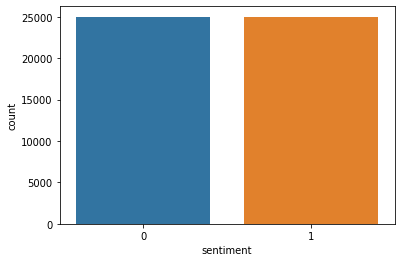

In [9]:
import seaborn as sns
sns.countplot(x='sentiment', data=movie_reviews)

In [10]:
movie_reviews.shape

(50000, 2)

In [11]:
print(len(movie_reviews))

50000


In [12]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [13]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [14]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [15]:
y = movie_reviews['sentiment']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [17]:
#feature extraction with Tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(40000, 10000) (10000, 10000)


In [18]:
#use ML algorithms classifier
#use a Naive Bayes Classifier and train the model on the training set.
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

In [19]:
#test the performance of our model on the test set to predict the sentiment labels
from  sklearn.metrics  import accuracy_score
predicted = clf.predict(test_vectors)
print("Naive Bayes Accuracy Score -> ", accuracy_score(y_test,predicted)*100)


Naive Bayes Accuracy Score ->  85.75


In [ ]:
#use SVM- Support Vector Machine
# fit the training dataset on the classifier
from sklearn import svm
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(train_vectors,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(test_vectors)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  89.41


**Learning word embedding **


In [20]:
#Below code converts the text to integer indexes, now ready to be used in Keras embedding layer.

from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

tokenizer_obj=Tokenizer()
total_reviews= X_train + X_test
tokenizer_obj.fit_on_texts(total_reviews)


#define the maximum lenght of list in corpus
max_lenght=max([len(s.split()) for s in total_reviews])
print('Maximum lenght', max_lenght)

#define the number of unique words in the corpus 
vocab_size=len(tokenizer_obj.word_index)+1
print('The number of unique words in the corpus' ,vocab_size)

X_train_tokens= tokenizer_obj.texts_to_sequences(X_train)
X_test_tokens= tokenizer_obj.texts_to_sequences(X_test)

#We add padding to make all the vectors of same length (max_length)
X_train_pad=pad_sequences(X_train_tokens, maxlen=max_lenght, padding='post')
X_test_pad=pad_sequences(X_test_tokens, maxlen=max_lenght, padding='post')

maximum lenght 2362
the number of unique words in the corpus 101399


**Train word2vec Embedding**


In [21]:
review_lines=list()
lines=movie_reviews['review'].values.tolist()

for line in lines:
  tokens=word_tokenize(line)
  #convert to lower case
  tokens=[w.lower() for w in tokens]
  #remove punctuation from each word
  table=str.maketrans('','',string.punctuation)
  stripped=[w.translate(table) for w in tokens]
  #remove remaining tokens that are not alphabetic
  words=[word for word in stripped if word.isalpha()]
  #filter out stop words
  stop_words=set(stopwords.words('english'))
  words=[w for w in words if not w in stop_words]
  review_lines.append(words)

In [22]:
len(review_lines)

50000

In [23]:
#creating word embeddings with word2vec 
EMBEDDING_DIM=100
model = gensim.models.Word2Vec(sentences=review_lines, size=EMBEDDING_DIM,sg=1, window=10, iter=5,min_count=10, workers=4)

#vocab size
words=list(model.wv.vocab)
print('Vovabulary size:%d' % len(words))


Vovabulary size:28327


In [24]:
#save model
filename='imdb_embedding_word2vec.txt'
model.wv.save_word2vec_format(filename, binary=False)


In [25]:
#Check the size of the vocabulary
#Vocabulary size is equal to the number of tokens from our corpus that had occurred at least 10 times
len(model.wv.vocab)

28327

In [26]:
#t-SNE for dimensionality reduction reducing 64-dimensional Project movie reviews word-vector space down to two dimensions
tsne = TSNE(n_components=2, n_iter=1000)
X_2d = tsne.fit_transform(model.wv[model.wv.vocab])
coords_df = pd.DataFrame(X_2d, columns=['x','y'])
coords_df['token'] = model.wv.vocab.keys()

In [27]:
coords_df.to_csv('reduce_dimentions.csv', index=False)

In [28]:
 coords_df = pd.read_csv('reduce_dimentions.csv')

In [29]:
coords_df.head()

,x,y,token
0,28.315847,16.702972,another
1,39.560947,-14.298949,good
2,40.368880,3.074302,animation
3,40.407642,3.462471,disney
4,37.177418,-0.072529,sequels


In [30]:
#Create Interactive bokeh two-dimensional word-vector plot
output_notebook()
subset_df = coords_df.sample(n=5000)
p = figure(plot_width=800, plot_height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)
show(p)

In [31]:
model.wv.most_similar('movie', topn=3)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('film', 0.856487512588501),
 ('sequal', 0.7777935862541199),
 ('hesitated', 0.7712117433547974)]

In [32]:
model.wv.doesnt_match("woman king queen movie".split())

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'movie'

In [33]:
model.wv.most_similar('horrible')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('terrible', 0.8945765495300293),
 ('awful', 0.8609350919723511),
 ('bad', 0.8176149129867554),
 ('pathetic', 0.7806077003479004),
 ('horrendous', 0.7789108753204346),
 ('atrocious', 0.7779361605644226),
 ('lousy', 0.7631365060806274),
 ('horrid', 0.7581247091293335),
 ('godawful', 0.7510504722595215),
 ('laughable', 0.7370618581771851)]

In [34]:
#As a final little intrinsic test, we can compute word-vector analogies

model.wv.most_similar(positive=["woman", "king"], negative=["man"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('duchess', 0.5966563820838928),
 ('throne', 0.5882924795150757),
 ('queen', 0.578282356262207),
 ('ursula', 0.5562005043029785),
 ('monarch', 0.5494451522827148),
 ('viii', 0.5490291118621826),
 ('triton', 0.5447302460670471),
 ('victoria', 0.542542576789856),
 ('stepsisters', 0.5413815975189209),
 ('lollobrigida', 0.5342751145362854)]

**Use Pre-trained Embedding**

In [35]:
#Let us extract the word embeddings from the stored file(imdb_embedding_word2vec.txt).
from keras.layers import Embedding
import os

embeddings_index = {}
f = open(os.path.join('','imdb_embedding_word2vec.txt'), encoding="utf-8")
for line in f:
  values=line.split()
  word=values[0]
  coefs=np.asarray(values[1:])
  embeddings_index[word]=coefs
f.close()

In [36]:
#The next step is to convert the word embedding into tokenized vector
#vectorize the text samples into a 2D integer tensor

tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(review_lines)
sequences=tokenizer_obj.texts_to_sequences(review_lines)

#pad sequences
word_index= tokenizer_obj.word_index
print('Found %s unique tokens.' % len(word_index))

review_pad = pad_sequences(sequences, maxlen=2362)
sentiment= df['sentiment'].values
print('shape of review tensor:', review_pad.shape)
print('Shape of sentiment tensor:', sentiment.shape)


Found 134156 unique tokens.
shape of review tensor: (50000, 2362)
Shape of sentiment tensor: (50000,)


In [37]:
#Now we will map embeddings from the loaded word2vec model for each word to
#the tokenizer_obj.word_index vocabulary and create a matrix of word vectors.
num_words=len (word_index) + 1
embedding_matrix=np.zeros((num_words, EMBEDDING_DIM))

for word,i in word_index.items():
  if i > num_words:
    continue
  embedding_vector=embeddings_index.get(word)
  if embedding_vector is not None:
    #words not found in embedding index will be all_zeros.
    embedding_matrix[i]=embedding_vector

In [38]:
print(num_words)

134157


**Build Simple Neural Network Model with word2vec**

In [40]:
#Build Neural Network Model
#The model will use an Embedding layer as the first hidden layer.

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers.embeddings import Embedding
from keras.initializers import Constant
from keras.layers import Dense, Activation, Flatten

#The Embedding layer requires the specification of the vocabulary size (vocab_size),
# the size of the real-valued vector space EMBEDDING_DIM = 100,
# and the maximum length of input documents max_length .

EMBEDDING_DIM= 100
print('Build model...')

model=Sequential()
embedding_layer=Embedding(num_words,EMBEDDING_DIM,
                          embeddings_initializer=Constant(embedding_matrix),
                          input_length=2362, trainable=False)

model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Build model...


In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2362, 100)         13415700  
_________________________________________________________________
flatten_1 (Flatten)          (None, 236200)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 236201    
Total params: 13,651,901
Trainable params: 236,201
Non-trainable params: 13,415,700
_________________________________________________________________


In [42]:
#Split the data into a training set and a validation set
VALIDATION_SPLIT= 0.2
indices = np.arange(review_pad.shape[0])
np.random.shuffle(indices)
review_pad = review_pad[indices]
sentiment=sentiment[indices]
num_validation_samples=int(VALIDATION_SPLIT * review_pad.shape[0])

X_train_pad = review_pad[:-num_validation_samples]
y_train = sentiment[:-num_validation_samples]
X_test_pad = review_pad[-num_validation_samples:]
y_test = sentiment[-num_validation_samples:]

In [43]:
print('shape of X_train_pad tensor:', X_train_pad.shape)
print('shape of y_train tensor:', y_train.shape)

print('shape of X_test_pad tensor:', X_test_pad.shape)
print('shape of y_test tensor:', y_test.shape)

shape of X_train_pad tensor: (40000, 2362)
shape of y_train tensor: (40000,)
shape of X_test_pad tensor: (10000, 2362)
shape of y_test tensor: (10000,)


In [44]:
#Train Model
print('Train Dense Model...')
history=model.fit(X_train_pad, y_train, batch_size=128, epochs=6, validation_data=(X_test_pad,y_test), verbose=1)

Train Dense Model...
Epoch 1/6
313/313 [==============================] - 15s 49ms/step - loss: 0.4525 - accuracy: 0.8027 - val_loss: 0.3778 - val_accuracy: 0.8407
Epoch 2/6
313/313 [==============================] - 14s 44ms/step - loss: 0.3143 - accuracy: 0.8763 - val_loss: 0.3542 - val_accuracy: 0.8489
Epoch 3/6
313/313 [==============================] - 13s 42ms/step - loss: 0.2693 - accuracy: 0.8960 - val_loss: 0.3481 - val_accuracy: 0.8497
Epoch 4/6
313/313 [==============================] - 13s 43ms/step - loss: 0.2431 - accuracy: 0.9081 - val_loss: 0.3481 - val_accuracy: 0.8497
Epoch 5/6
313/313 [==============================] - 13s 43ms/step - loss: 0.2221 - accuracy: 0.9175 - val_loss: 0.3572 - val_accuracy: 0.8473
Epoch 6/6
313/313 [==============================] - 13s 43ms/step - loss: 0.2081 - accuracy: 0.9228 - val_loss: 0.3631 - val_accuracy: 0.8477


In [45]:
score = model.evaluate(X_test_pad, y_test, verbose=1)

313/313 [==============================] - 3s 10ms/step - loss: 0.3631 - accuracy: 0.8477


In [46]:
#To check the test accuracy and loss
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.36306485533714294
Test Accuracy: 0.8476999998092651


In [47]:
history.history

{'accuracy': [0.8027250170707703,
  0.8762500286102295,
  0.8959749937057495,
  0.908050000667572,
  0.9174500107765198,
  0.9228000044822693],
 'loss': [0.45253118872642517,
  0.31430113315582275,
  0.2693209648132324,
  0.24310658872127533,
  0.22210463881492615,
  0.20805932581424713],
 'val_accuracy': [0.8406999707221985,
  0.8489000201225281,
  0.8496999740600586,
  0.8496999740600586,
  0.8472999930381775,
  0.8476999998092651],
 'val_loss': [0.37780773639678955,
  0.3542385697364807,
  0.3481006622314453,
  0.34806734323501587,
  0.3572362959384918,
  0.36306479573249817]}

In [70]:
def plot_learningCurve(history,epochs):
  #Plot training & validation accuray values
  epoch_range=range(1,epochs+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Dense Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  #Plot training & validation loss values
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Dense Model loss')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

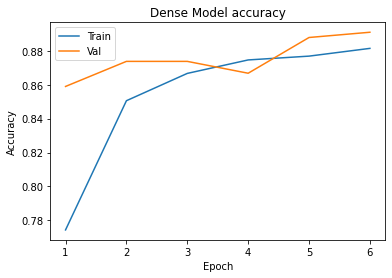

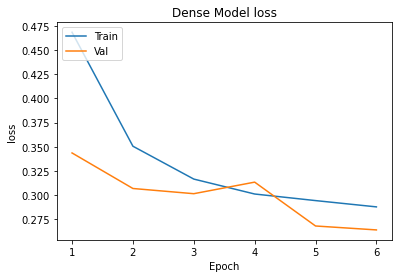

In [71]:
plot_learningCurve(history, 6)

In [50]:
y_hat = model.predict(X_test_pad)

In [51]:
from sklearn.metrics import roc_auc_score
pct_auc = roc_auc_score(y_test, y_hat)*100.0
"{:0.2f}".format(pct_auc)

'92.19'

In [52]:
float_y_hat = []
for y in y_hat:
    float_y_hat.append(y[0])
ydf = pd.DataFrame(list(zip(float_y_hat, y_test)),
                   columns=['y_hat', 'y'])

In [53]:
ydf.head(10)

,y_hat,y
0,0.982701,1
1,0.823021,1
2,0.015735,0
3,0.023812,0
4,0.034458,0
5,0.973415,1
6,0.002665,0
7,0.559821,0
8,0.021811,0
9,0.973289,1


**Build Neural Network Model with GRU**

In [55]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers.embeddings import Embedding
from keras.initializers import Constant

#define model

model=Sequential()
embedding_layer=Embedding(num_words,EMBEDDING_DIM,
                          embeddings_initializer=Constant(embedding_matrix),
                          input_length=2362, trainable=False)

model.add(embedding_layer)
model.add(GRU(units=32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 2362, 100)         13415700  
_________________________________________________________________
gru (GRU)                    (None, 32)                12864     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 13,428,597
Trainable params: 12,897
Non-trainable params: 13,415,700
_________________________________________________________________


In [57]:
#Train Model
print('Train GRU Model...')
history=model.fit(X_train_pad, y_train, batch_size=128, epochs=6, validation_data=(X_test_pad,y_test), verbose=1)

Train GRU Model...
Epoch 1/6
313/313 [==============================] - 1039s 3s/step - loss: 0.4683 - accuracy: 0.7743 - val_loss: 0.3436 - val_accuracy: 0.8590
Epoch 2/6
313/313 [==============================] - 1051s 3s/step - loss: 0.3506 - accuracy: 0.8506 - val_loss: 0.3069 - val_accuracy: 0.8738
Epoch 3/6
313/313 [==============================] - 1058s 3s/step - loss: 0.3167 - accuracy: 0.8667 - val_loss: 0.3016 - val_accuracy: 0.8738
Epoch 4/6
313/313 [==============================] - 1058s 3s/step - loss: 0.3012 - accuracy: 0.8747 - val_loss: 0.3135 - val_accuracy: 0.8668
Epoch 5/6
313/313 [==============================] - 1053s 3s/step - loss: 0.2944 - accuracy: 0.8769 - val_loss: 0.2682 - val_accuracy: 0.8879
Epoch 6/6
313/313 [==============================] - 1060s 3s/step - loss: 0.2880 - accuracy: 0.8815 - val_loss: 0.2642 - val_accuracy: 0.8910


In [58]:
score = model.evaluate(X_test_pad, y_test, verbose=1)

313/313 [==============================] - 72s 231ms/step - loss: 0.2642 - accuracy: 0.8910


In [59]:
#To check the test accuracy and loss
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.2641620337963104
Test Accuracy: 0.890999972820282


In [60]:
history.history

{'accuracy': [0.7742999792098999,
  0.8505749702453613,
  0.8666999936103821,
  0.8746500015258789,
  0.8769000172615051,
  0.8814749717712402],
 'loss': [0.46830081939697266,
  0.3505946397781372,
  0.3166642189025879,
  0.3012406826019287,
  0.2944469749927521,
  0.28795138001441956],
 'val_accuracy': [0.859000027179718,
  0.8737999796867371,
  0.8737999796867371,
  0.8668000102043152,
  0.8878999948501587,
  0.890999972820282],
 'val_loss': [0.343639075756073,
  0.30694401264190674,
  0.30156955122947693,
  0.3135065734386444,
  0.26822298765182495,
  0.26416218280792236]}

In [74]:
def plot_learningCurve(history,epochs):
  #Plot training & validation accuray values
  epoch_range=range(1,epochs+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('GRU Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  #Plot training & validation loss values
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('GRU Model loss')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

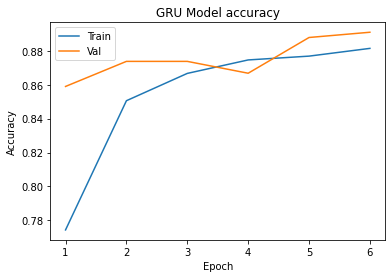

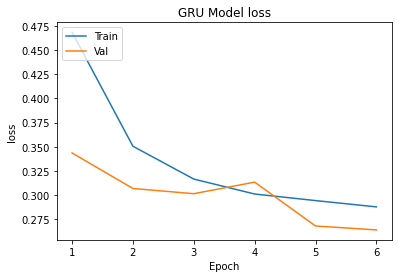

In [75]:
plot_learningCurve(history, 6)

In [63]:
y_hat = model.predict(X_test_pad)

In [64]:
from sklearn.metrics import roc_auc_score
pct_auc = roc_auc_score(y_test, y_hat)*100.0
"{:0.2f}".format(pct_auc)

'95.85'

In [65]:
ydf.head(10)

,y_hat,y
0,0.982701,1
1,0.823021,1
2,0.015735,0
3,0.023812,0
4,0.034458,0
5,0.973415,1
6,0.002665,0
7,0.559821,0
8,0.021811,0
9,0.973289,1


**Build Neural Network Model with Recurrent Neural Network (LSTM)**

In [77]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense,Embedding

In [78]:
model=Sequential()
embedding_layer=Embedding(num_words,EMBEDDING_DIM,
                          embeddings_initializer=Constant(embedding_matrix),
                          input_length=2362, trainable=False)

model.add(embedding_layer)
model.add(LSTM(units=128, activation='tanh'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 2362, 100)         13415700  
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 13,533,077
Trainable params: 117,377
Non-trainable params: 13,415,700
_________________________________________________________________


In [80]:
#Train Model
print('Train LSTM Model...')
history=model.fit(X_train_pad, y_train, batch_size=128, epochs=6, validation_data=(X_test_pad,y_test), verbose=1)

Train LSTM Model...
Epoch 1/6
313/313 [==============================] - 1970s 6s/step - loss: 0.4250 - accuracy: 0.8112 - val_loss: 0.3508 - val_accuracy: 0.8551
Epoch 2/6
313/313 [==============================] - 1962s 6s/step - loss: 0.3429 - accuracy: 0.8546 - val_loss: 0.3233 - val_accuracy: 0.8674
Epoch 3/6
313/313 [==============================] - 2001s 6s/step - loss: 0.3160 - accuracy: 0.8666 - val_loss: 0.3036 - val_accuracy: 0.8736
Epoch 4/6
313/313 [==============================] - 2009s 6s/step - loss: 0.3027 - accuracy: 0.8744 - val_loss: 0.3158 - val_accuracy: 0.8745
Epoch 5/6
313/313 [==============================] - 1984s 6s/step - loss: 0.2865 - accuracy: 0.8824 - val_loss: 0.3082 - val_accuracy: 0.8832
Epoch 6/6
313/313 [==============================] - 2001s 6s/step - loss: 0.2802 - accuracy: 0.8869 - val_loss: 0.2685 - val_accuracy: 0.8869


In [81]:
score = model.evaluate(X_test_pad, y_test, verbose=1)

313/313 [==============================] - 176s 562ms/step - loss: 0.2685 - accuracy: 0.8869


In [82]:
#To check the test accuracy and loss
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.2684597373008728
Test Accuracy: 0.886900007724762


In [83]:
history.history

{'accuracy': [0.8112000226974487,
  0.8546000123023987,
  0.8666499853134155,
  0.8743500113487244,
  0.8824499845504761,
  0.8868749737739563],
 'loss': [0.42498189210891724,
  0.3428705334663391,
  0.31602904200553894,
  0.3026902973651886,
  0.28649958968162537,
  0.28019317984580994],
 'val_accuracy': [0.8550999760627747,
  0.8673999905586243,
  0.8736000061035156,
  0.8744999766349792,
  0.8831999897956848,
  0.886900007724762],
 'val_loss': [0.35083723068237305,
  0.3233267664909363,
  0.303570032119751,
  0.315768301486969,
  0.30817559361457825,
  0.268459677696228]}

In [84]:
def plot_learningCurve(history,epochs):
  #Plot training & validation accuray values
  epoch_range=range(1,epochs+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('LSTM Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  #Plot training & validation loss values
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('LSTM Model loss')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

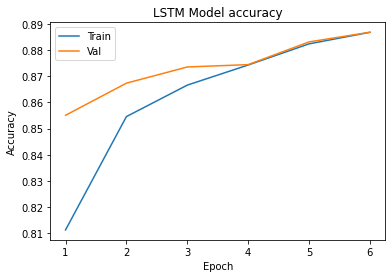

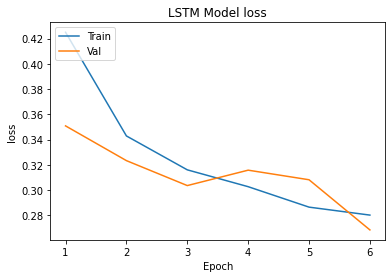

In [85]:
plot_learningCurve(history, 6)

In [86]:
y_hat = model.predict(X_test_pad)

In [87]:
from sklearn.metrics import roc_auc_score
pct_auc = roc_auc_score(y_test, y_hat)*100.0
"{:0.2f}".format(pct_auc)

'95.65'

In [88]:
ydf.head(10)

,y_hat,y
0,0.982701,1
1,0.823021,1
2,0.015735,0
3,0.023812,0
4,0.034458,0
5,0.973415,1
6,0.002665,0
7,0.559821,0
8,0.021811,0
9,0.973289,1


**Build Neural Network Model with a Convolutional Neural Network**

In [89]:
from keras.layers import GlobalMaxPooling1D
from keras.layers.convolutional import Conv1D
from keras.layers.core import Activation, Dropout, Dense

In [108]:
model = Sequential()
embedding_layer=Embedding(num_words,EMBEDDING_DIM,
                          embeddings_initializer=Constant(embedding_matrix),
                          input_length=2362, trainable=False)

model.add(embedding_layer)
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [92]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 2362, 100)         13415700  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2358, 128)         64128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 13,479,957
Trainable params: 64,257
Non-trainable params: 13,415,700
_________________________________________________________________


In [93]:
#Train Model
print('Train CNN Model...')
history=model.fit(X_train_pad, y_train, batch_size=128, epochs=6, validation_data=(X_test_pad,y_test), verbose=1)


Train CNN Model...
Epoch 1/6
313/313 [==============================] - 572s 2s/step - loss: 0.4018 - acc: 0.8211 - val_loss: 0.3031 - val_acc: 0.8730
Epoch 2/6
313/313 [==============================] - 575s 2s/step - loss: 0.2853 - acc: 0.8826 - val_loss: 0.2751 - val_acc: 0.8859
Epoch 3/6
313/313 [==============================] - 578s 2s/step - loss: 0.2444 - acc: 0.9022 - val_loss: 0.2729 - val_acc: 0.8857
Epoch 4/6
313/313 [==============================] - 575s 2s/step - loss: 0.2160 - acc: 0.9164 - val_loss: 0.2566 - val_acc: 0.8938
Epoch 5/6
313/313 [==============================] - 577s 2s/step - loss: 0.1878 - acc: 0.9311 - val_loss: 0.2520 - val_acc: 0.8951
Epoch 6/6
313/313 [==============================] - 570s 2s/step - loss: 0.1662 - acc: 0.9421 - val_loss: 0.2538 - val_acc: 0.8942


In [94]:
#To evaluate the performance of the model, we can simply pass the test set to the evaluate method of our model
score = model.evaluate(X_test_pad, y_test, verbose=1)

313/313 [==============================] - 52s 167ms/step - loss: 0.2538 - acc: 0.8942


In [95]:
#To check the test accuracy and loss
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.25377821922302246
Test Accuracy: 0.8942000269889832


In [102]:
history.history

{'acc': [0.8210750222206116,
  0.8826000094413757,
  0.9022499918937683,
  0.9163500070571899,
  0.9311249852180481,
  0.9420999884605408],
 'loss': [0.4017694294452667,
  0.28528329730033875,
  0.2443501502275467,
  0.21599650382995605,
  0.18783146142959595,
  0.16621167957782745],
 'val_acc': [0.8730000257492065,
  0.8859000205993652,
  0.885699987411499,
  0.8938000202178955,
  0.8950999975204468,
  0.8942000269889832],
 'val_loss': [0.3030698597431183,
  0.2750823199748993,
  0.2728978395462036,
  0.2565672695636749,
  0.25196969509124756,
  0.2537783682346344]}

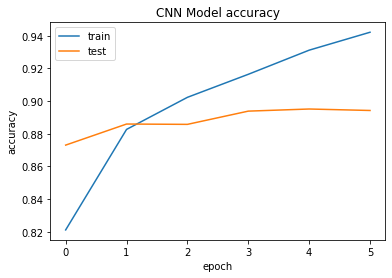

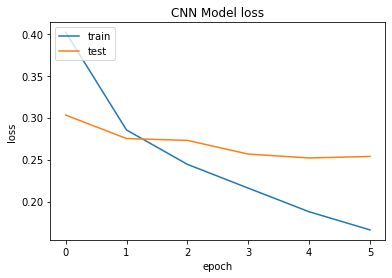

In [103]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('CNN Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('CNN Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [105]:
y_hat = model.predict(X_test_pad)

In [106]:
from sklearn.metrics import roc_auc_score
pct_auc = roc_auc_score(y_test, y_hat)*100.0
"{:0.2f}".format(pct_auc)

'96.24'

In [107]:
ydf.head(10)

,y_hat,y
0,0.982701,1
1,0.823021,1
2,0.015735,0
3,0.023812,0
4,0.034458,0
5,0.973415,1
6,0.002665,0
7,0.559821,0
8,0.021811,0
9,0.973289,1
